# Regression

### a. Importing Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, r2_score

### b. Importing Dataset

In [22]:
dataset = pd.read_csv("winequality-white.csv",sep=";")

In [23]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
train_set, test_set = train_test_split(dataset, test_size=0.2)
print(train_set.shape, test_set.shape)

(3918, 12) (980, 12)


### c. Creating Regression Dataset

In [115]:
acidity_X_train = train_set[["quality"]].values
acidity_y_train = train_set[["residual sugar"]].values
acidity_X_test = test_set[["quality"]].values
acidity_y_test = test_set[["residual sugar"]].values

In [106]:
acidity_X_train.ravel().shape

(3918,)

In [107]:
acidity_y_train.shape

(3918, 1)

## 1. Linear Regression

<u>1. Declaring the model</u>

In [116]:
model = LinearRegression().fit(acidity_X_train, acidity_y_train.ravel())

<u>2. Fitting the model</u>

In [117]:
model.fit(acidity_X_train, acidity_y_train)

LinearRegression()

<u>3. Testing the model</u>

In [118]:
pred = model.predict(acidity_X_test)

In [119]:
print('Mean squared error: %.2f' % mean_squared_error(acidity_y_test, pred))
print('Coefficient of determination: %.2f'% r2_score(acidity_y_test, pred))

Mean squared error: 28.09
Coefficient of determination: 0.01


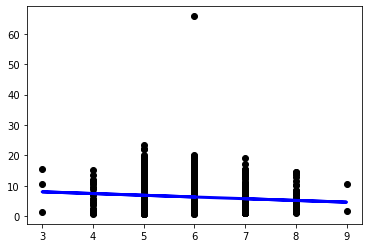

In [120]:
plt.scatter(acidity_X_test, acidity_y_test,  color='black')
plt.plot(acidity_X_test, pred, color='blue', linewidth=3)

plt.show()

## 2. Logistic Regression

<u>1. Declaring the model</u>

In [103]:
model = LogisticRegression(max_iter=300,solver="liblinear")

<u>2. Fitting the model</u>

In [104]:
model.fit(acidity_X_train, acidity_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=300, solver='liblinear')

<u>3. Testing the model</u>

F1 score :  0.4714285714285714


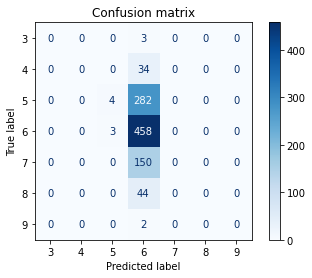

In [105]:
pred = model.predict(acidity_X_test)

disp = plot_confusion_matrix(model, acidity_X_test, acidity_y_test,
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print("F1 score : ", f1_score(pred,acidity_y_test,average='micro'))